# Création d'une application pour la santé publique

# <a name="C2"> - Nettoyage des données</a>

### 1. Chargement des données

In [1]:
# chargement des packages
from matplotlib import pyplot as plt
import seaborn as sns
import time 
from datetime import datetime
import pandas as pd
import os
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from matplotlib.patches import FancyArrowPatch
from functions import *


In [57]:
# gestion des erreurs
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [2]:

# chargment des données
data = pd.read_csv('ps.csv',sep='\t',low_memory=False)


In [3]:
data.head()


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# on crée une copie des données
df=data.copy()

In [5]:
# Nombrre de lignes et colonnes
df.shape

(320772, 162)

In [6]:
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

### 2. Filtrage

Dans ce projet, On va travailler uniquement avec les données collectées en france

In [7]:
df['countries']=df['countries'].str.lower()
df=df.loc[df['countries'].str.contains('fr', na=False,case=False)]
df.shape

(98468, 162)

### 3. Erreurs de type

Le premier reflexe devrait être de vérifier que les variables ont bien été importées dans le bon type :

In [8]:
#types des variables
df.dtypes


code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

In [9]:
# on compte le nombre de variables pour chaque type
df.dtypes.value_counts()

float64    106
object      56
dtype: int64

<AxesSubplot:ylabel='None'>

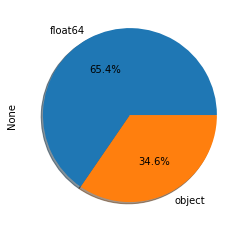

In [10]:
df.dtypes.value_counts().plot.pie(autopct='%1.1f%%', shadow=True)


### 4. Recherche de valeurs manquantes

In [11]:
df.isna()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,False,False,False,False,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True
46,False,False,False,False,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True
48,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
106,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,False,False,True,True
136,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
320763,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,True,True
320764,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
320765,False,False,False,False,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True


Text(0.5, 1.0, 'heatmap des variables avec les Nans')

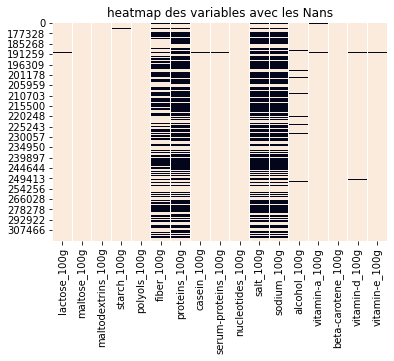

In [27]:
df1=df[df.loc[:,'lactose_100g':'vitamin-e_100g'].columns]
#plt.figure(figsize=(20,10))
sns.heatmap(df1.isna(),cbar=False)
plt.title('heatmap des variables avec les Nans')


Ce graphique nous montre qu'il y'a plusieurs valeurs manquantes qui son t representés par les parties blanches dans certaines colones.

In [12]:
# on determine le nombre de valeurs manquantes dans chaque colonne
df.isna().sum()

code                           0
url                            0
creator                        0
created_t                      0
created_datetime               1
                           ...  
carbon-footprint_100g      98292
nutrition-score-fr_100g    37017
nutrition-score-uk_100g    37017
glycemic-index_100g        98468
water-hardness_100g        98468
Length: 162, dtype: int64

In [13]:
# Pourcentage de valeurs manquantes dans chaque colonne
df.isna().sum()/df.shape[0]

code                       0.000000
url                        0.000000
creator                    0.000000
created_t                  0.000000
created_datetime           0.000010
                             ...   
carbon-footprint_100g      0.998213
nutrition-score-fr_100g    0.375929
nutrition-score-uk_100g    0.375929
glycemic-index_100g        1.000000
water-hardness_100g        1.000000
Length: 162, dtype: float64

In [14]:
# on ordonne ces pourcentages
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

code                   0.0
states_tags            0.0
states                 0.0
countries_tags         0.0
states_fr              0.0
                      ... 
elaidic-acid_100g      1.0
gondoic-acid_100g      1.0
mead-acid_100g         1.0
nervonic-acid_100g     1.0
water-hardness_100g    1.0
Length: 162, dtype: float64

Text(0.5, 1.0, 'Barplot des variables en frequence de nans')

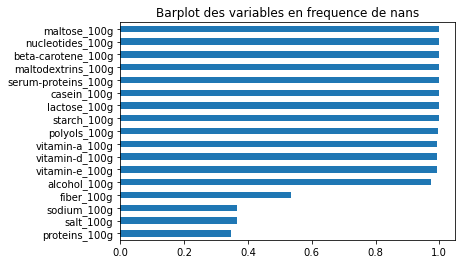

In [25]:
# diagramme en bar des pourcentages des valeurs manquantes
df1=df[df.loc[:,'lactose_100g':'vitamin-e_100g'].columns]
#plt.figure(figsize=(10,5))
(df1.isna().sum()/df1.shape[0]).sort_values(ascending=True).plot.barh()
plt.title('Barplot des variables en frequence de nans')


In [34]:
#suppresion de variables avec avec plus de 80% de valeurs manquantes
df=df[df.columns[df.isna().sum()/df.shape[0]<0.8]]
df.shape

(98468, 60)

Text(0.5, 1.0, 'heatmap des variables à 0.8 de frequence de Nans')

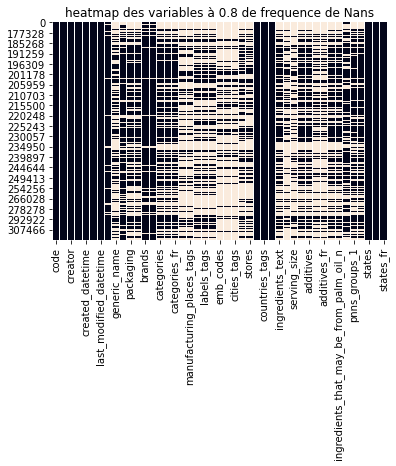

In [33]:
df1=df[df.loc[:,'code':'states_fr'].columns]
#plt.figure(figsize=(20,10))
sns.heatmap(df1.isna(),cbar=False)
plt.title('heatmap des variables à 0.8 de frequence de Nans')


In [13]:
df['pnns_groups_1'].unique()

array([nan, 'unknown', 'Cereals and potatoes', 'Sugary snacks',
       'Beverages', 'Fish Meat Eggs', 'Composite foods',
       'Fruits and vegetables', 'Milk and dairy products', 'Salty snacks',
       'Fat and sauces', 'fruits-and-vegetables', 'sugary-snacks',
       'cereals-and-potatoes'], dtype=object)

In [35]:
df['pnns_groups_1'] = df['pnns_groups_1'].replace(to_replace='sugary-snacks', value='Sugary snacks')

In [36]:
df['pnns_groups_2'].unique()

array([nan, 'unknown', 'Legumes', 'Biscuits and cakes', 'Sweets',
       'Non-sugared beverages', 'Sweetened beverages', 'Meat',
       'One-dish meals', 'Soups', 'Chocolate products',
       'Alcoholic beverages', 'Sandwich', 'Cheese', 'Appetizers',
       'Dressings and sauces', 'Dried fruits', 'Nuts',
       'Breakfast cereals', 'Pizza pies and quiche', 'Fruits',
       'Fruit juices', 'Fats', 'Cereals', 'Vegetables', 'Bread',
       'Processed meat', 'vegetables', 'Ice cream', 'Fish and seafood',
       'pastries', 'Milk and yogurt', 'Dairy desserts', 'Tripe dishes',
       'Artificially sweetened beverages', 'Fruit nectars', 'Potatoes',
       'Eggs', 'Salty and fatty products', 'fruits', 'legumes', 'cereals'],
      dtype=object)

In [37]:
# suppression des certaines colonnes
col=df.loc[:, 'url':'additives_tags'].columns.append(df.loc[:, 'states':'image_small_url'].columns).append(df.loc[:,'nutrition-score-uk_100g':'nutrition-score-uk_100g'].columns)
df=df.drop(col, axis=1)
df.shape

(98468, 17)

In [38]:

df["ingredients_palm_oil_n"] = df[["ingredients_from_palm_oil_n","ingredients_that_may_be_from_palm_oil_n"]].sum(axis=1)
df=df.drop(['ingredients_that_may_be_from_palm_oil_n','ingredients_from_palm_oil_n'],axis=1)


In [39]:
df.columns

Index(['code', 'additives_fr', 'nutrition_grade_fr', 'pnns_groups_1',
       'pnns_groups_2', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'ingredients_palm_oil_n'],
      dtype='object')

In [40]:
dfm=pd.concat([df[df.loc[:,'code':'additives_fr'].columns],df[df.loc[:,'nutrition_grade_fr':'pnns_groups_2'].columns]],axis=1)
dfn=pd.concat([df[df.loc[:,"ingredients_palm_oil_n":"ingredients_palm_oil_n"].columns],df[df.loc[:,'energy_100g':'nutrition-score-fr_100g'].columns]],axis=1)
df=pd.concat([dfm,dfn],axis=1)
df

,code,additives_fr,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,ingredients_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,0000000003087,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,NaN,NaN,unknown,unknown,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,E322 - Lécithines,e,unknown,unknown,0.0,1883.0,20.0,12.5,70.0,57.5,2.5,2.5,0.09652,0.038,22.0
136,0000000039259,NaN,NaN,unknown,unknown,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,NaN,NaN,NaN,Alcoholic beverages,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,NaN,c,Beverages,Non-sugared beverages,0.0,21.0,0.2,0.2,0.5,0.5,0.2,0.5,0.02540,0.010,2.0
320764,9918,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,NaN,NaN,Fish Meat Eggs,Processed meat,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 5. Recherche de doublons

Maintenant on va rgarder si notre jeu de données contient des doublons en utilisant la colonne code pour identifier des        codes qui repetent.

In [41]:
df.loc[df[['code']].duplicated(keep=False),:]


,code,additives_fr,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,ingredients_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g


### 6. Supprimons de doublons

In [42]:
df.drop_duplicates(subset=['code'], inplace=True, ignore_index=True)



### 7. Détection d'outliers :

Un describe peut potentiellement nous aider dans un premier temps :

In [43]:
df.describe()

,ingredients_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,98468.000000,6.462700e+04,47677.000000,62412.000000,47245.000000,62555.000000,45747.000000,64354.000000,62613.000000,62610.000000,61451.000000
mean,0.118495,1.171628e+03,13.340016,5.426280,27.749530,13.431192,2.559144,7.754553,1.160270,0.456820,8.684757
std,0.424065,1.283255e+04,16.939263,8.536277,27.411755,19.087523,4.633990,7.887170,4.308534,1.696255,9.046268
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,4.270000e+02,1.300000,0.300000,4.000000,1.000000,0.000000,1.800000,0.080000,0.031496,1.000000
50%,0.000000,1.035000e+03,6.800000,2.000000,14.500000,4.100000,1.390000,6.000000,0.558800,0.220000,9.000000
75%,0.000000,1.649000e+03,21.000000,7.400000,53.000000,17.800000,3.200000,11.000000,1.244600,0.490000,15.000000
max,6.000000,3.251373e+06,380.000000,210.000000,190.000000,105.000000,178.000000,100.000000,211.000000,83.000000,40.000000


On observe plusieurs valeurs aberrantes sur les données.En effet à part les colonnes Nutritions_score et energy_100g qui ont un seuil respectif de 3760(car "1g de graisse apporte 37,6kJ) et de -15 à 40 de score, toutes les autres colonnes doivent avoir  comme valeurs maximales 100g. 

Ces outliers apparait également sur les boxplots et QQplots suivants reprentés par catégorie.

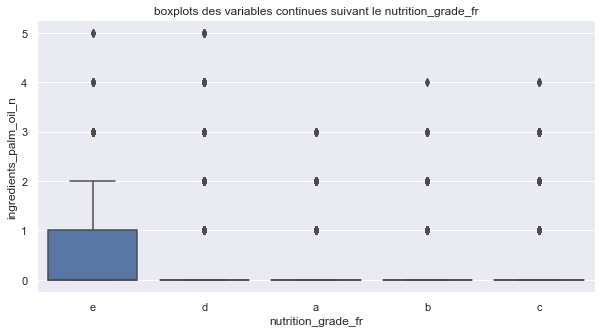

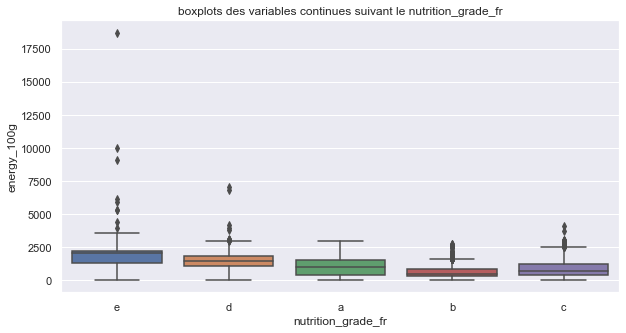

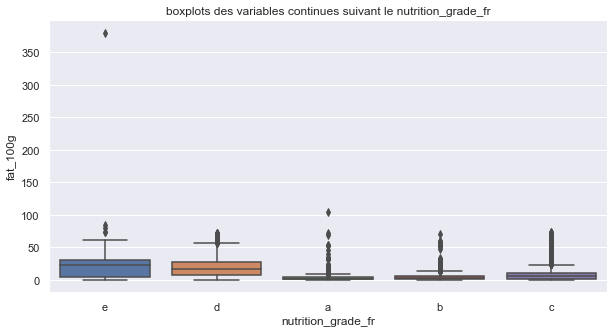

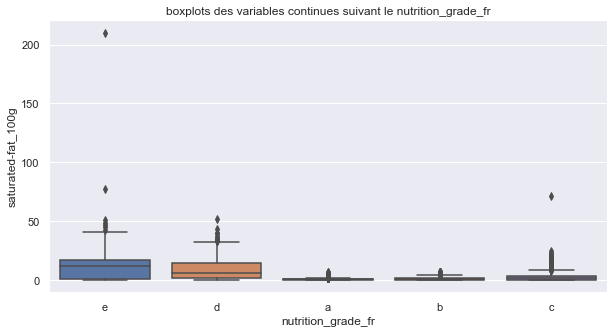

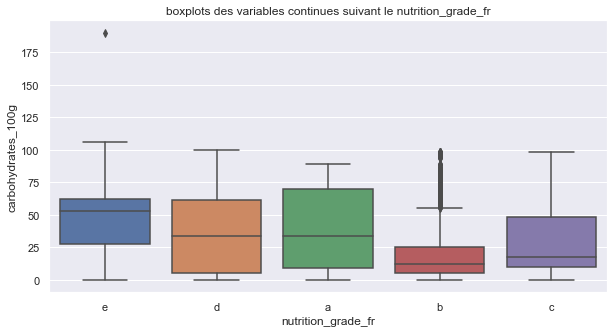

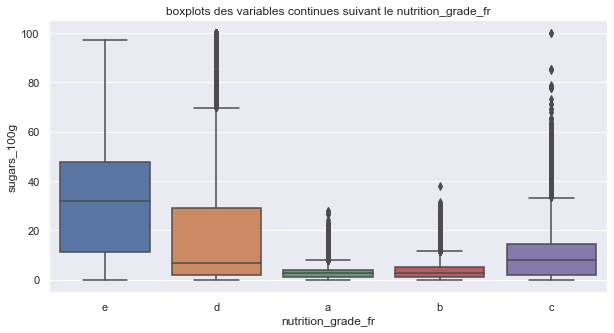

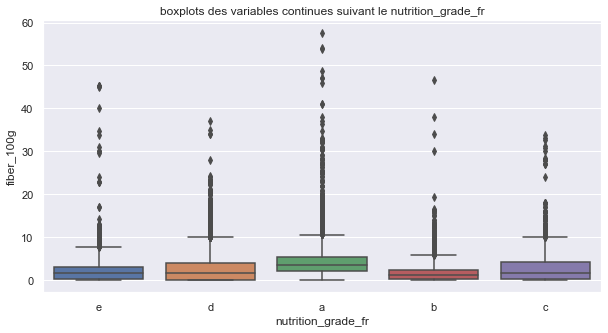

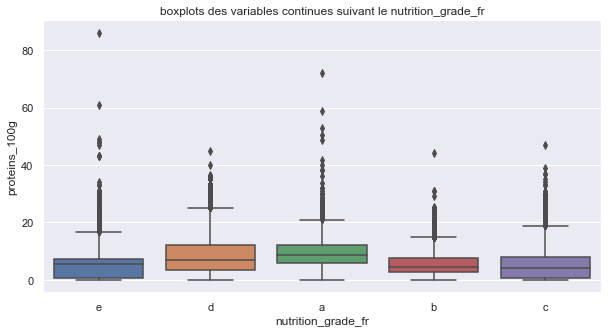

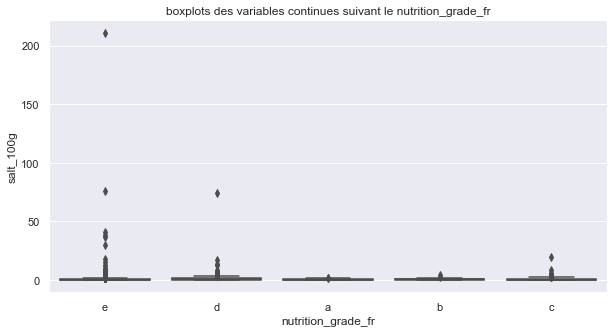

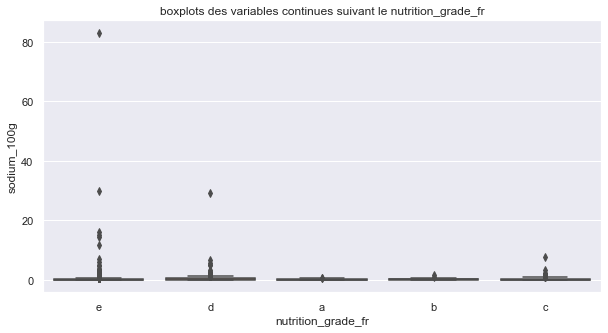

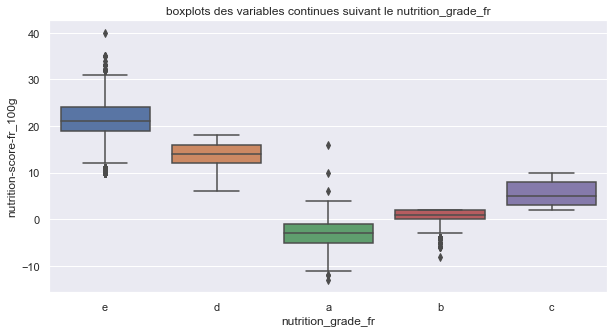

In [51]:
sns.set()
for col in df.select_dtypes('float'):
  plt.figure(figsize=(10,5))
  plt.subplot()
  sns.boxplot(y= df[col],x='nutrition_grade_fr',data=df[[col,'nutrition_grade_fr']],orient='v')
  plt.title('boxplots des variables continues suivant le nutrition_grade_fr')
  plt.show()
  

In [58]:
# choix de quelques modalités 
df1=df.loc[df['pnns_groups_1'].isin(['Sugary snacks','Cereals and potatoes','Beverages',
        'Composite foods',
       'Milk and dairy products', 'Salty snacks']),:]
df2=df.loc[df['pnns_groups_2'].isin(['Biscuits and cakes','pastries','Ice cream','One-dish meals','Chocolate products','Appetizers']),:]
df1.pnns_groups_2=df2.pnns_groups_2
df=df1

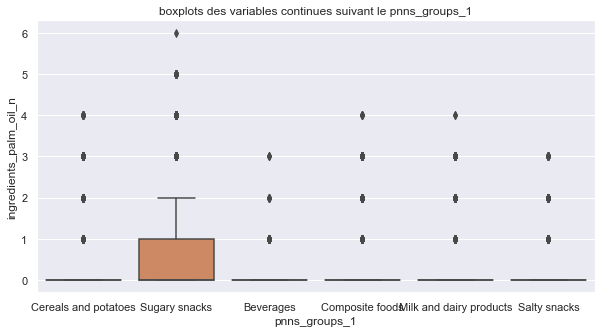

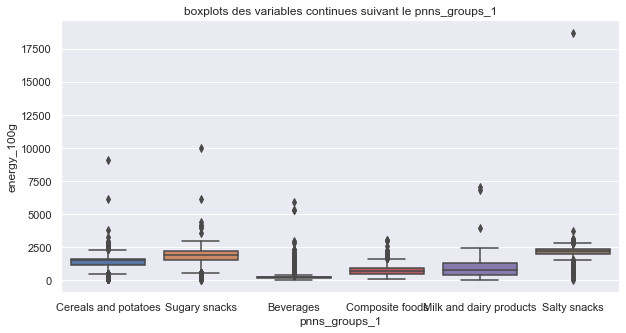

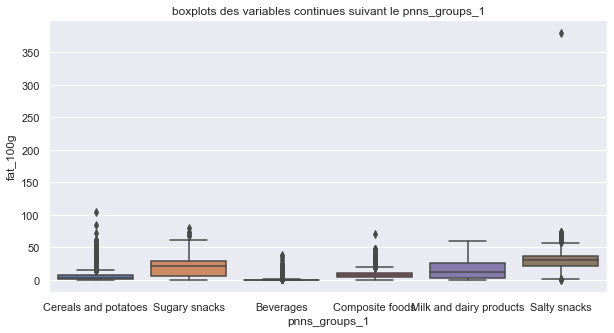

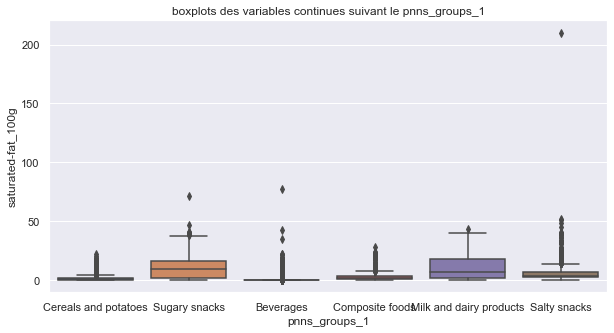

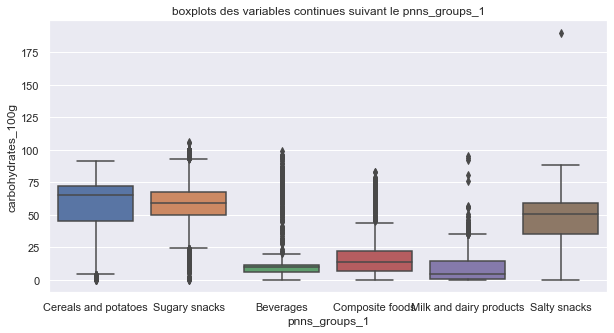

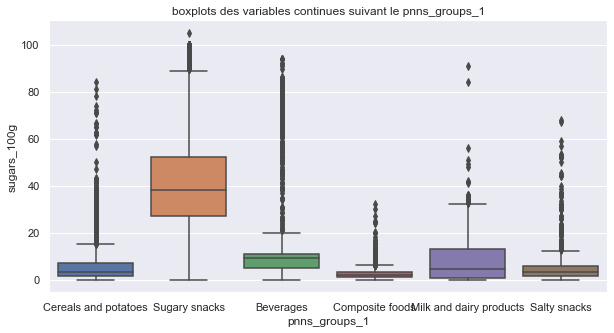

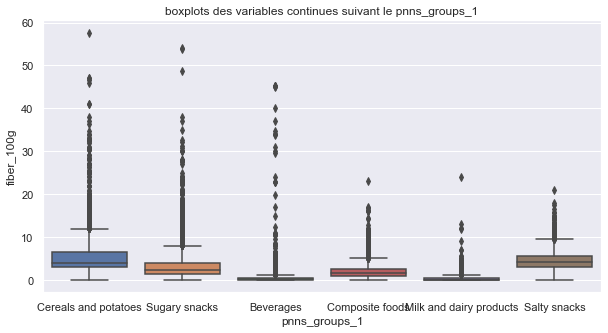

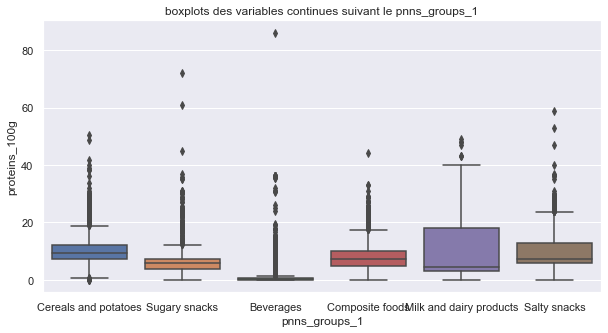

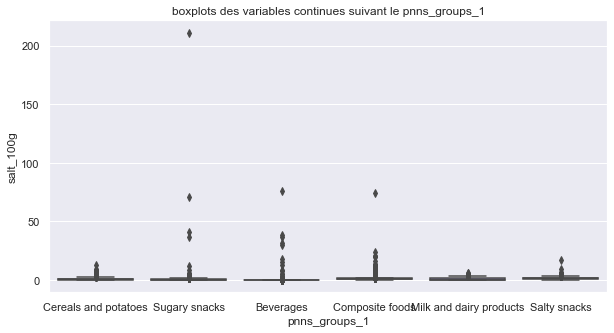

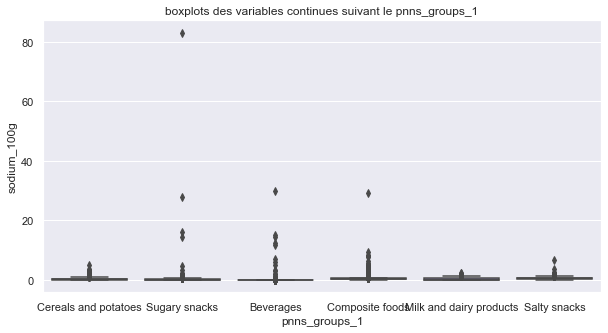

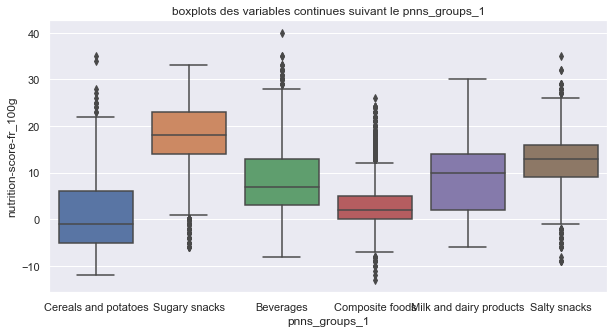

In [52]:

for col in df.select_dtypes('float'):
  plt.figure(figsize=(10,5))
  plt.subplot()
  sns.boxplot(y= df[col],x='pnns_groups_1',data=df[[col,'pnns_groups_1']],orient='v')
  plt.title('boxplots des variables continues suivant le pnns_groups_1')

  plt.show()
  

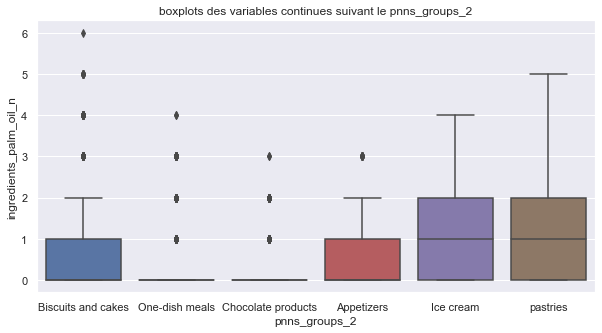

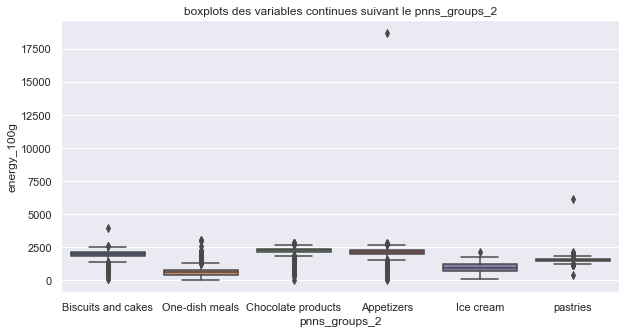

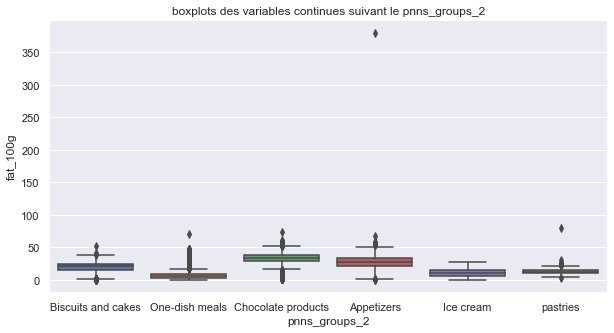

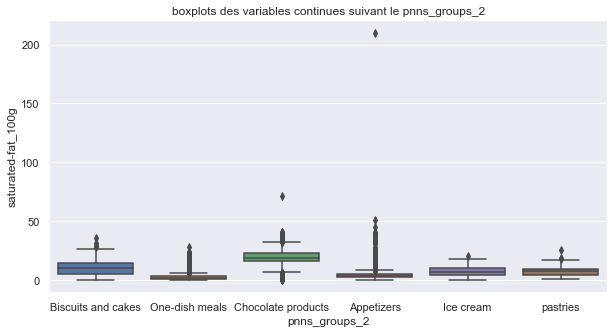

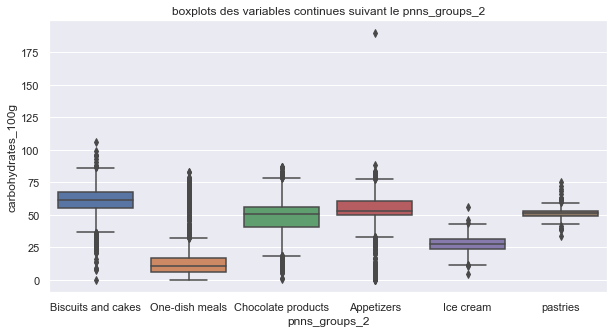

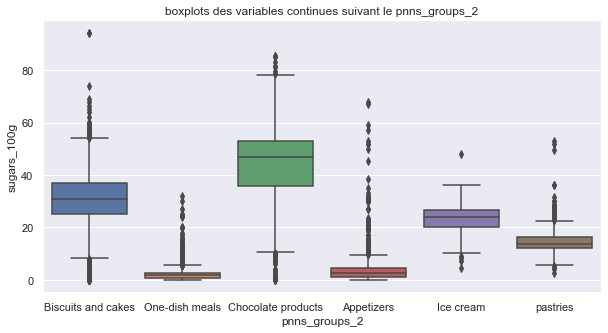

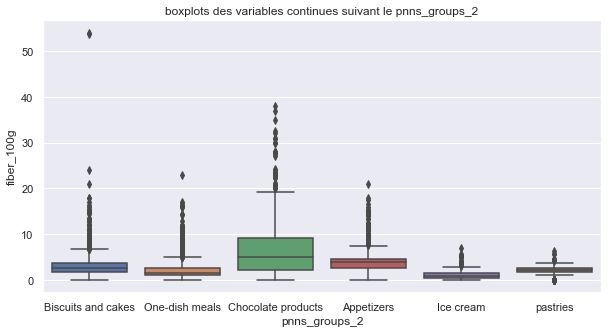

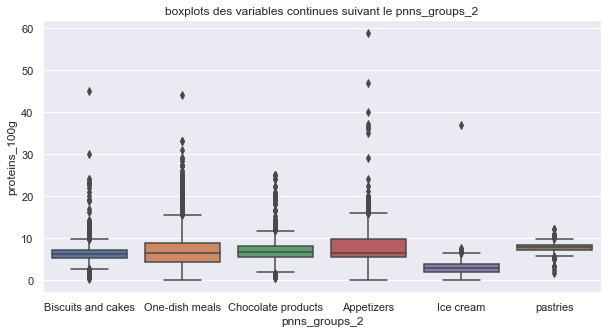

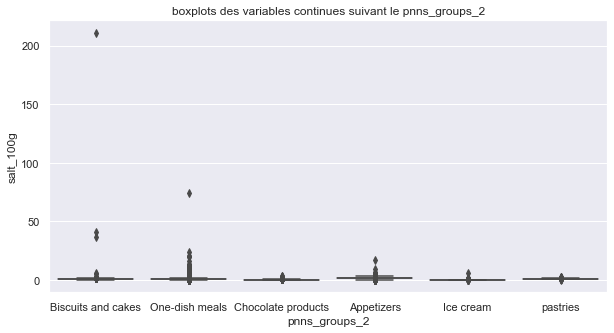

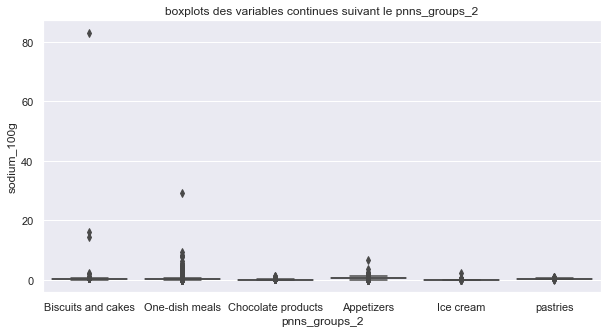

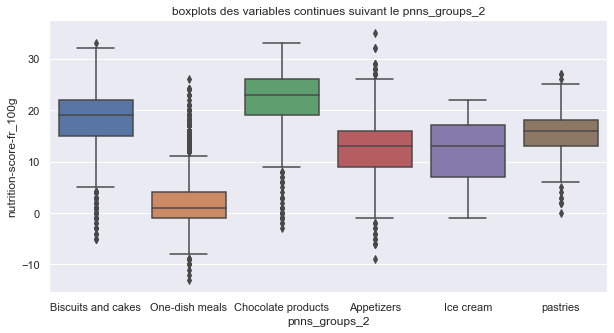

In [53]:
for col in df.select_dtypes('float'):
  plt.figure(figsize=(10,5))
  plt.subplot()
  sns.boxplot(y= df[col],x='pnns_groups_2',data=df[[col,'pnns_groups_2']],orient='v')
  plt.title('boxplots des variables continues suivant le pnns_groups_2')
  plt.show()

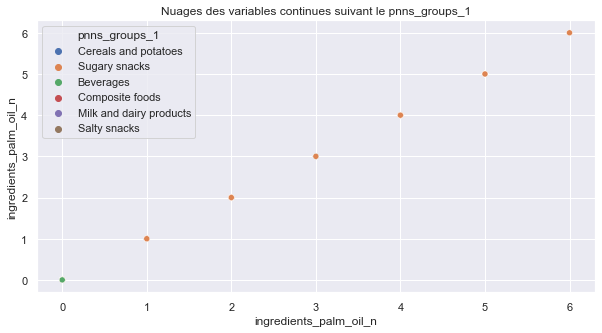

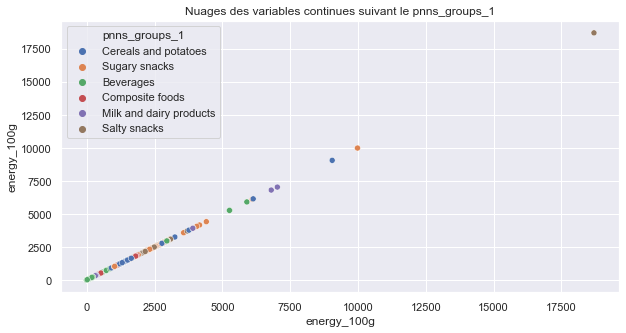

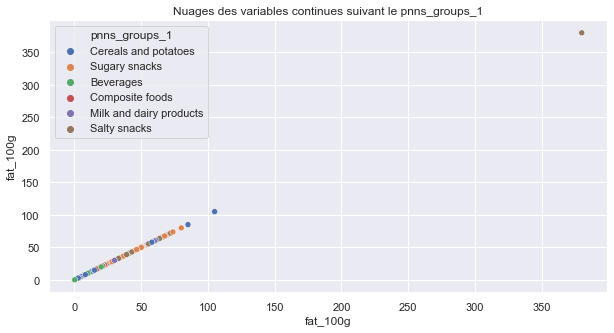

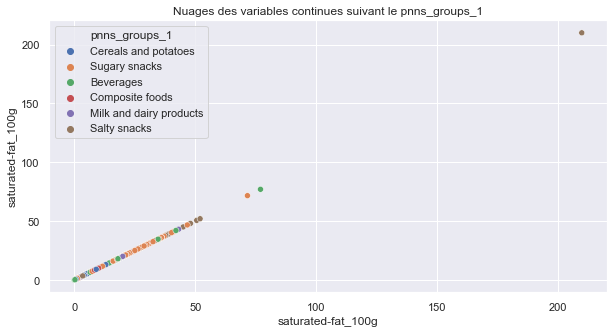

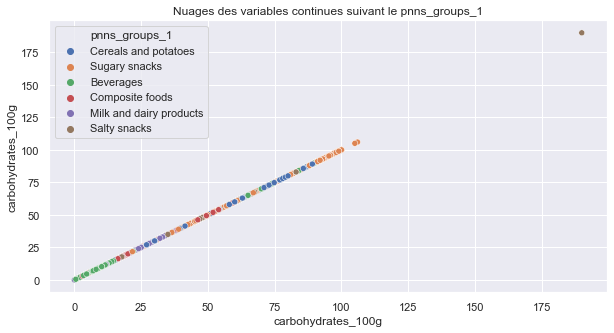

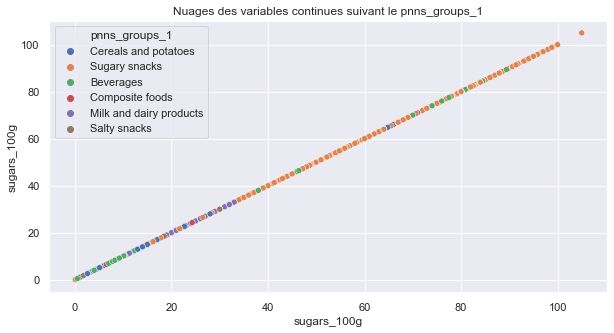

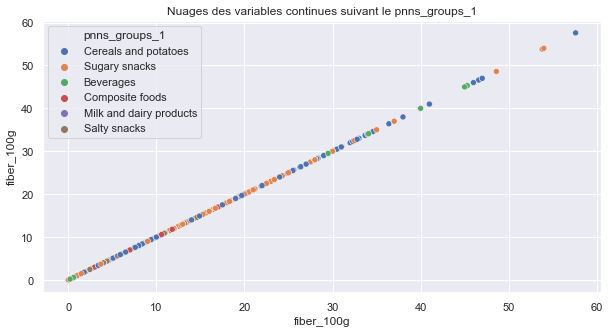

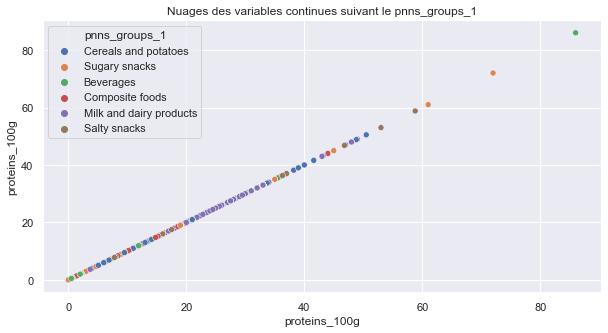

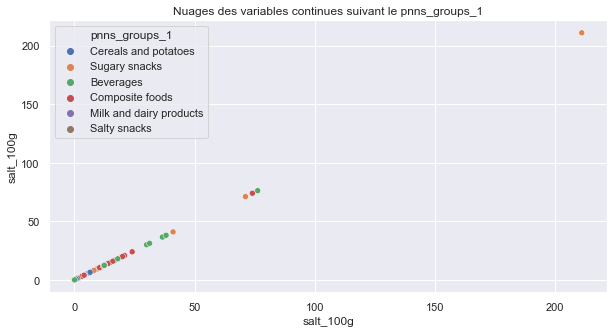

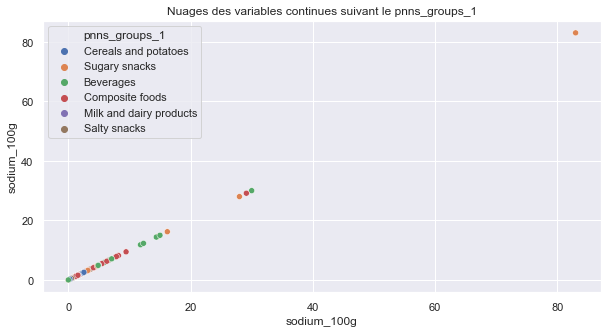

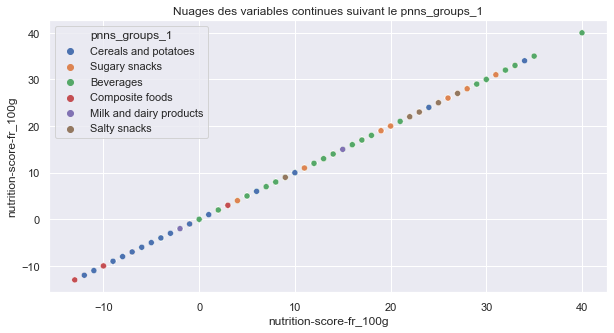

In [55]:
for col in df.select_dtypes('float'):
    fig = plt.figure(figsize=(10,5))
    #for i in range(1,df3.select_dtypes('float').shape[1]+1):
       # axes = fig.add_subplot(6, 2, i)
    sns.scatterplot(data=df,y=df[col],x=col,hue='pnns_groups_1')
    plt.title('Nuages des variables continues suivant le pnns_groups_1')
    
 

### 8. Supprimons les outliers

In [59]:
df=pd.concat([dfm,dfn],axis=1)
for col in df.loc[:,'energy_100g':'sodium_100g'].columns:
    q1 = df[col].describe()['25%']
    q3 = df[col].describe()['75%']
    iqr = q3 - q1 #Interquartile range
#Outlier reference point
    outlier_min = q1 - (iqr) * 1.5
    outlier_max = q3 + (iqr) * 1.5
    df[col]=df[col].where(~(df[col]>outlier_min)|(df[col]<outlier_max))


In [60]:
# On verifie que les outliers ont été bien supprimé
df.describe()

,ingredients_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,98468.000000,64132.000000,45969.000000,57899.000000,47242.000000,56118.000000,42658.000000,61802.000000,59220.000000,59217.000000,61451.000000
mean,0.118495,1095.178188,11.089702,3.716342,27.740856,8.105573,1.714688,6.795783,0.663984,0.261423,8.684757
std,0.424065,747.639077,11.980020,4.772375,27.390504,10.446755,1.931166,6.059692,0.683312,0.269021,9.046268
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,423.000000,1.200000,0.200000,4.000000,0.900000,0.000000,1.600000,0.060000,0.023622,1.000000
50%,0.000000,1028.000000,6.100000,1.600000,14.500000,3.200000,1.100000,5.700000,0.485570,0.192000,9.000000
75%,0.000000,1636.000000,19.000000,5.495000,53.000000,11.300000,2.800000,9.700000,1.100000,0.433071,15.000000
max,6.000000,3477.000000,50.500000,18.000000,106.000000,42.900000,7.990000,24.710000,2.990000,1.177165,40.000000


### 9. Remplacement des Nans soit par( 0 ,la moyenne ou le mode )

In [61]:
# Remplaçons les Nans par le mode dans les colonnes de type de objet
for col in df.loc[:,'additives_fr':'pnns_groups_2'].columns:
    mode=df[col].mode()
    df[col]=df[col].fillna(mode[0])

In [62]:
# remplacement des Nans par 0
df31=df[df.loc[:,'code':'pnns_groups_2'].columns]
df32=df[df.loc[:,"ingredients_palm_oil_n":'nutrition-score-fr_100g'].columns].fillna(0)
df1=pd.concat([df31,df32],axis=1)


In [63]:
# remplacement des Nans par la moyenne
df41=df[df.loc[:,'code':'pnns_groups_2'].columns]
df42=df[df.loc[:,"ingredients_palm_oil_n":'nutrition-score-fr_100g'].columns].fillna(df.mean())
df2=pd.concat([df41,df42],axis=1)


In [64]:
# remplacement des Nans par la mediane
df51=df[df.loc[:,'code':'pnns_groups_2'].columns]
df52=df[df.loc[:,"ingredients_palm_oil_n":'nutrition-score-fr_100g'].columns].fillna(df.median())
df3=pd.concat([df51,df52],axis=1)


Text(0.5, 1.0, 'distrib avec fillna_med ')

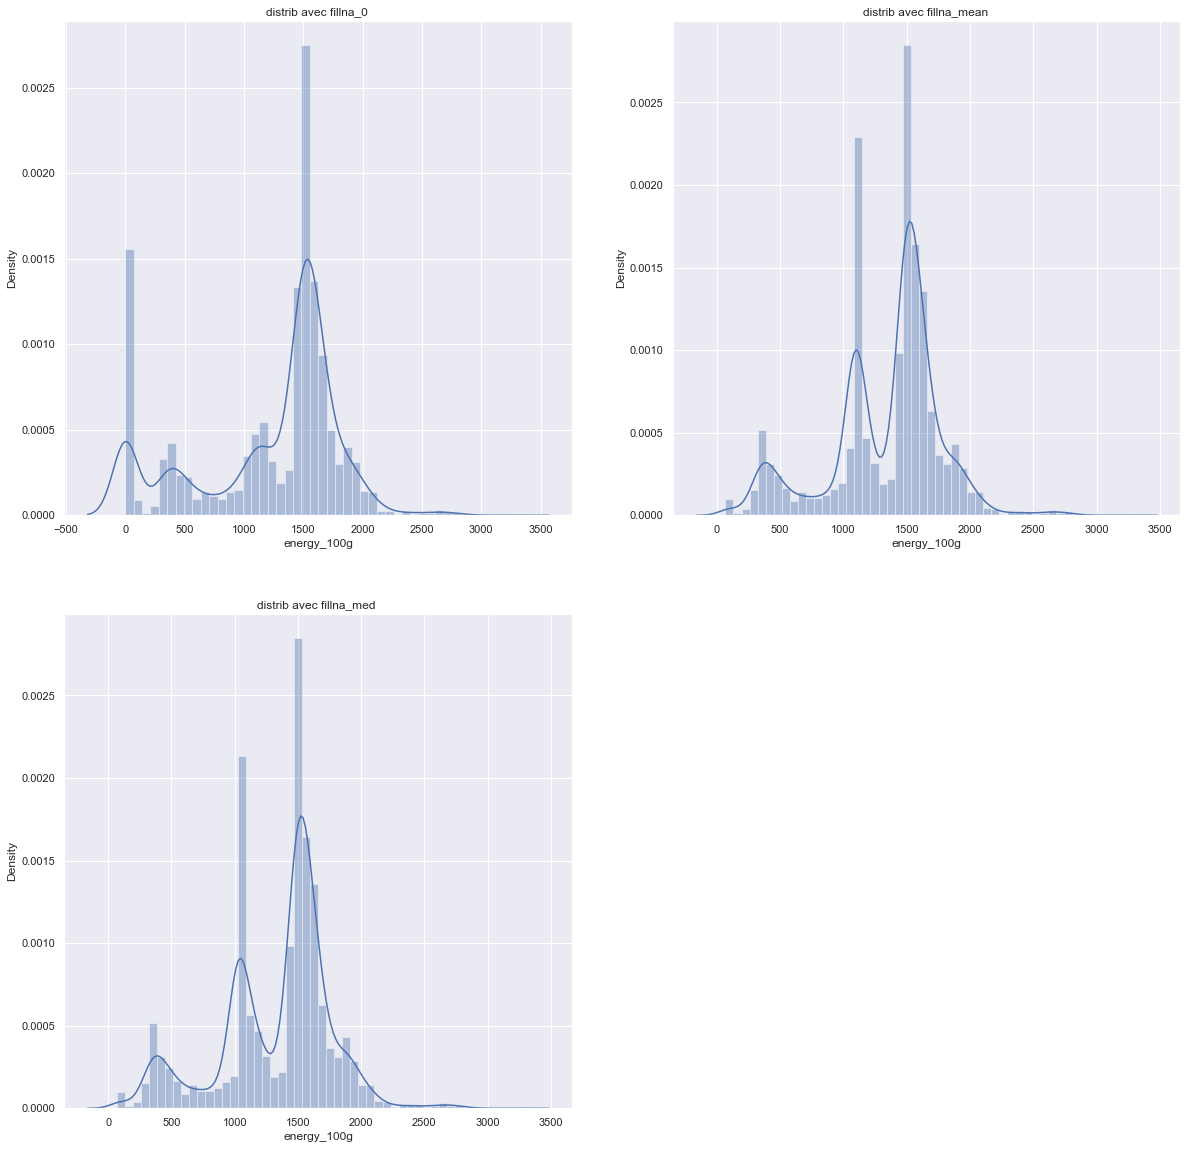

In [65]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.distplot(df1.loc[df1['pnns_groups_1'].str.contains('Cereals and potatoes', na=False,case=False)]['energy_100g'])
plt.title('distrib avec fillna_0 ')
plt.subplot(2,2,2)
sns.distplot(df2.loc[df2['pnns_groups_1'].str.contains('Cereals and potatoes', na=False,case=False)]['energy_100g'])
plt.title('distrib avec fillna_mean ')
plt.subplot(2,2,3)
sns.distplot(df3.loc[df2['pnns_groups_1'].str.contains('Cereals and potatoes', na=False,case=False)]['energy_100g'])
plt.title('distrib avec fillna_med ')


In [66]:
std_nan=df.loc[df['nutrition_grade_fr'].str.contains('a', na=False,case=False)]['energy_100g'].std()
std_nan_0=df1.loc[df1['nutrition_grade_fr'].str.contains('a', na=False,case=False)]['energy_100g'].std()
std_nan_mean=df2.loc[df2['nutrition_grade_fr'].str.contains('a', na=False,case=False)]['energy_100g'].std()
std_nan_med=df3.loc[df3['nutrition_grade_fr'].str.contains('a', na=False,case=False)]['energy_100g'].std()


In [67]:
P_0=std_nan_0/std_nan*100
P_mean=std_nan_mean/std_nan*100
P_med=std_nan_med/std_nan*100

In [68]:
print(' P_0 = ',P_0,'\n P_mean = ',P_mean,'\n P_med = ',P_med)

 P_0 =  100.052802997765 
 P_mean =  99.95137440455349 
 P_med =  99.9398827908239


On garde l'information à 99.94% en remplaçant les nans par la mediane et 100.05 % par 0 et 99.95% par la moyenne.
Donc ce serait par preference de remplacer les Nans par la mediane pour la suite.

In [69]:
df=df3

In [70]:
data=df.drop("code",axis=1)
data=df.drop("additives_fr",axis=1)
df=data.copy()


In [71]:
df.isna()

,code,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,ingredients_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
46,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
136,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
320763,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
320764,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
320765,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [72]:
df.describe()

,ingredients_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,98468.000000,98468.000000,98468.000000,98468.000000,98468.000000,98468.000000,98468.000000,98468.000000,98468.000000,98468.000000,98468.000000
mean,0.118495,1071.753012,8.429402,2.844405,20.852567,5.995740,1.366293,6.387752,0.592871,0.233750,8.803266
std,0.424065,604.214487,8.555569,3.804858,20.092222,8.251981,1.307056,4.829822,0.537064,0.211373,7.147994
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,695.000000,6.100000,1.000000,14.500000,2.500000,1.100000,4.000000,0.219964,0.086614,4.000000
50%,0.000000,1028.000000,6.100000,1.600000,14.500000,3.200000,1.100000,5.700000,0.485570,0.192000,9.000000
75%,0.000000,1374.250000,6.100000,2.300000,14.500000,4.100000,1.100000,7.000000,0.700000,0.275591,12.000000
max,6.000000,3477.000000,50.500000,18.000000,106.000000,42.900000,7.990000,24.710000,2.990000,1.177165,40.000000


###  10. Exportation du jeu données propre en fichier CSV 

Maintenant que notre jeu de donées est propre, exportons notre dataframe en fichier csv pour le notebook de la partie exploration.

In [73]:
data_foot_clean = df.to_csv("data_foot_clean.csv", index=False)